In [733]:
import sys

sys.path.append("..")

In [734]:
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt
from utils.file import read_text
import math
import numpy as np

In [735]:
# text = ""
# for i in range(7):
#     text += read_text(f"../datasets/harry-potter-{i+1}.txt")

text = read_text("../datasets/donquixote.txt")
    
text = text.lower()
tokens = word_tokenize(text)

In [736]:
len(tokens)

496715

### Herdon's Law

$$ |V| = k N^\beta $$

### Logarithmic form

$$ \log |V| = \log k + \beta \log N $$
$$ |V'| = k' + \beta N' $$  

where:
- $|V|$ is the size of the vocabulary
- $N$ is the size of the corpus
- $k$ and $\beta$ are constants

=> (linear regression form)



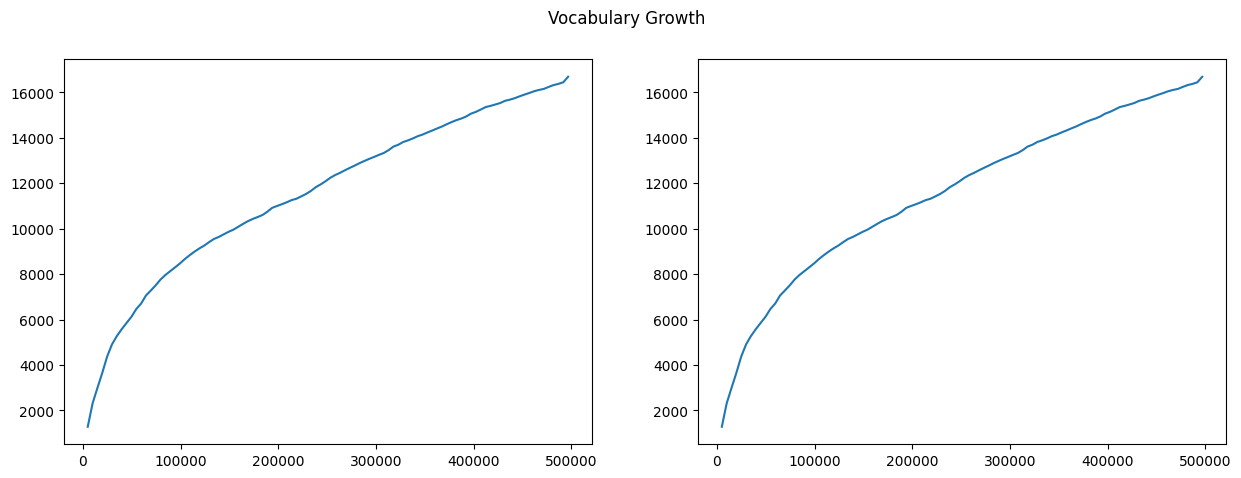

In [737]:
SEG_NUM = 100
n = len(tokens)

range_len = [(i+1) * n // SEG_NUM for i in range(SEG_NUM)]

data_points = [
    len(set(tokens[0 : range_len[i]])) for i in range(len(range_len))
]

data = list(zip(range_len, data_points))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Vocabulary Growth")
axs[0].plot(range_len, data_points)
axs[1].plot([d[0] for d in data], [d[1] for d in data])
plt.show()

In [738]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [739]:
from scipy.optimize import curve_fit

def herdon_law(x, k, beta):
    return k * (x ** beta)

popt, pcov = curve_fit(herdon_law, [d[0] for d in train_data], [d[1] for d in train_data])

k, beta = popt

k, beta

(56.72717607046299, 0.4324300975056644)

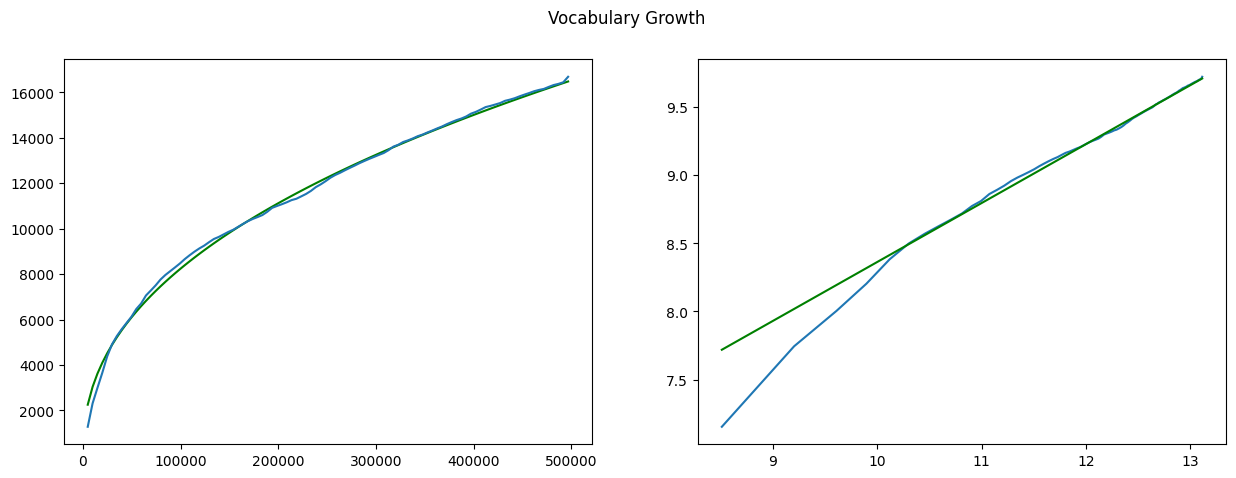

In [740]:
fig, axs = plt.subplots(1, 2,figsize=(15, 5))
fig.suptitle("Vocabulary Growth")

axs[0].set_xlabel("Number of Tokens")
axs[0].set_ylabel("Vocabulary Size")
axs[0].plot(
    range_len,
    [herdon_law(x, k, beta) for x in range_len],
    color="green",
)
axs[0].plot(range_len, data_points)

axs[1].plot([math.log(d[0]) for d in data], [math.log(d[1]) for d in data])
axs[1].plot(
    [math.log(d[0]) for d in data],
    [math.log(herdon_law(d[0], k, beta)) for d in data],
    color="green",
)